# Model implementation and execution with Scikit-NeuroMSI

This tutorial covers the basic pipeline for implementing and running multisensory integration models using `Scikit-NeuroMSI`. It covers the main objects and methods of the package: `NDResult`, `run` and `plot`. We show how to implement the different families of models currently supported by the package, organized in the `mle`, `bayesian` and `neural` modules.

> **Note**: In this tutorial we assume that you already have a basic knowledge of `numpy` and `matplotlib` for scientific computing.

## Implementation of Maximum Likelihood Estimation (MLE) models

To easily implement the model developed by Alais and Burr (2004) you can import the corresponding module and instatiate the `AlaisBurr2004` class: 

In [1]:
from skneuromsi.mle import AlaisBurr2004

model = AlaisBurr2004()
model

The model object has a built-in `run` method:

In [4]:
model.run

<function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0, noise=None)>

By calling this method we can observe its arguments:

- `auditory_position`: The position where the auditory stimulus is delivered (in degrees).
- `visual_position`: The position where the visual stimulus is delivered (in degrees).
- `auditory_sigma`: Standard deviation of the auditory estimate.
- `visual_sigma`: Standard deviation of the visual estimate.

Now let's run the model for equidistant auditory and visual locations:

In [3]:
res = model.run(visual_position=-5, auditory_position=5)
res

<NDResult 'AlaisBurr2004', modes=['auditory' 'visual' 'multi'], times=1, positions=4000, positions_coordinates=1, causes=False>

The model outputs one `NDResult` object containing the results of both unisensory estimators and the multisensory estimator. To make sense of our results, let's visualise the output using its built-in `plot` method:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

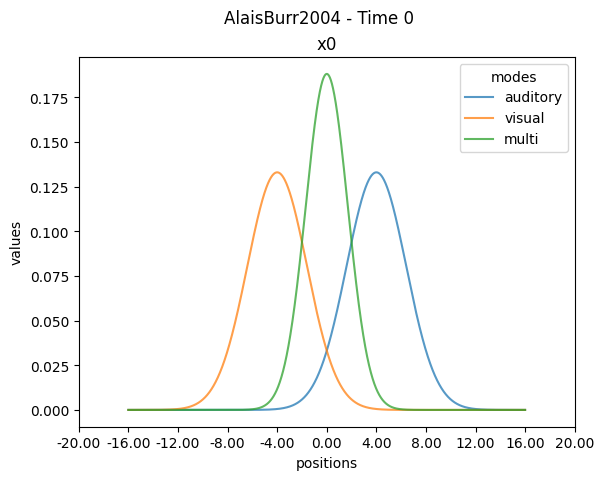

In [5]:
res.plot()

The plot shows how both auditory and visual estimates are combined into a single multisensory estimate. Now let's try a different configuration of the model run:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

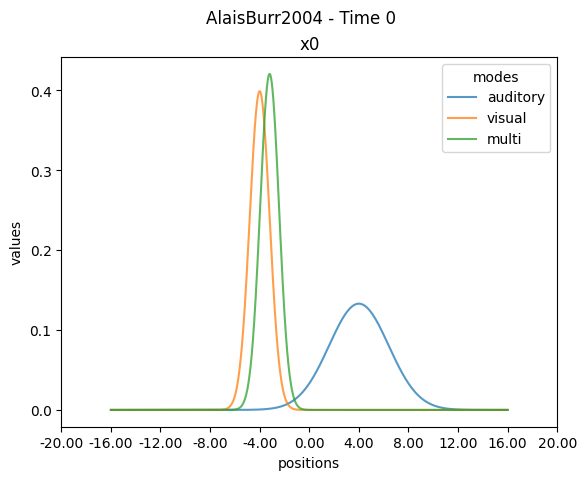

In [6]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=1, auditory_sigma=3
)
alter_res.plot()

In this new configuration we increased the precision of the visual estimate. By doing so, the multisensory estimate of the stimulus location is dramatically biased towards the visual estimate. The opposite happens if we decrease the visual stimulus precision:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

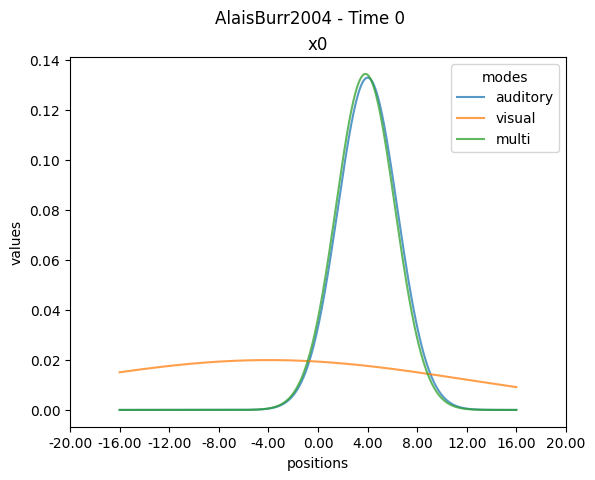

In [7]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=20, auditory_sigma=3
)
alter_res.plot()

By manipulating the precision of the unisensory estimates you've explored computationally the principles of the MLE estimation behind the model. Refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/mle/_alais_burr2004.html) for further information about parameters to manipulate.

> This demonstration of the Alais and Burr model mechanics is inspired in the Computational Cognitive Neuroscience course materials developed by [Dr. Peggy Series](https://homepages.inf.ed.ac.uk/pseries/index.html) at The University of Edinburgh.  

### Exploration of the model object

By calling the model using the `vars` function you can explore its main built-in parameters and methods:

In [8]:
vars(model)

{'_mode0': 'auditory',
 '_mode1': 'visual',
 '_position_range': (-20, 20),
 '_position_res': 0.01,
 '_time_range': (1, 1),
 '_time_res': 1.0,
 '_random': Generator(PCG64) at 0x72B4BD1F9540,
 'run': <function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0, noise=None)>}

- `mode0`: Name of the first sensory modality defined in the model.
- `mode1`: Name of the second sensory modality defined in the model.
- `position_range`: The range of possible positions where the stimulus could be delivered (in degrees).
- `position_res`: The resolution of the range of possible positions where the stimulus could be delivered (in degrees).
- `time_range`: The range of possible times when the stimulus could be delivered. Here is set to 1 because the model has no temporal dimension.
- `time_res`: The resolution of the range of possible times when the stimulus could be delivered.
- `run`: Executes the model and saves the result. 

We can re-implement Alais and Burr (2004) model with different sensory modalities and position ranges by modifying the initial parameters of the model:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

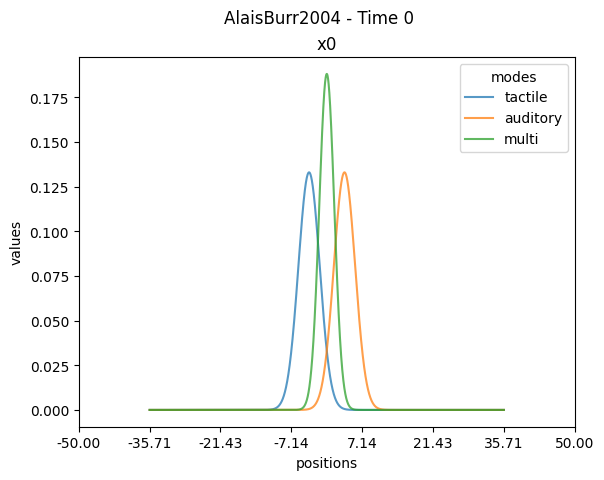

In [60]:
model = AlaisBurr2004(
    mode0="tactile", mode1="auditory", position_range=(-50, 50)
)
res = model.run()
res.plot()

### Exploration of the results object

By calling the `NDResult` object using the `vars` function you can explore its main built-in parameters and methods:

In [61]:
vars(res)

{'_mname': 'AlaisBurr2004',
 '_mtype': 'MLE',
 '_output_mode': 'multi',
 '_nmap': {'auditory': 'tactile',
  'visual': 'auditory',
  'auditory_weight': 'tactile_weight',
  'visual_weight': 'auditory_weight'},
 '_time_range': array([1, 1]),
 '_position_range': array([-50,  50]),
 '_time_res': 1.0,
 '_position_res': 0.01,
 '_run_parameters': {'tactile_position': -5,
  'auditory_position': 5,
  'tactile_sigma': 3.0,
  'auditory_sigma': 3.0,
  'noise': None},
 '_extra': {'tactile_weight': 0.5, 'auditory_weight': 0.5},
 '_causes': None,
 '_nddata': <xarray.DataArray 'values' (modes: 3, times: 1, positions: 10000,
                             positions_coordinates: 1)> Size: 240kB
 array([[[[1.84356985e-050],
          [1.93808093e-050],
          [2.03741451e-050],
          ...,
          [1.65115301e-074],
          [1.55331368e-074],
          [1.46125559e-074]]],
 
 
        [[[1.37463811e-074],
          [1.46125559e-074],
          [1.55331368e-074],
          ...,
          [2.1418154

We observe metadata related to the model that was executed to generate the results object, as well as the model execution (run) parameters. Notably it also holds the two main methods of this object: `plot` and `stats`.

## Implementation of Bayesian models

You can implement the Causal Inference model developed by Kording et al. (2007) by importing the corresponding module and instantiating the `Kording2007` class:

In [45]:
from skneuromsi.bayesian import Kording2007

model = Kording2007(position_range=(-20, 20), position_res=1, n=100000)
model

You can refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/bayesian/_kording2007.html) for more details about the available parameters.

Let's run the model for two conflicting stimulus locations:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

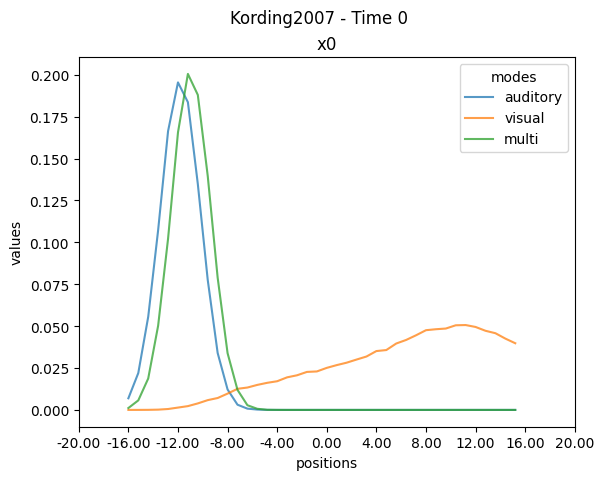

In [36]:
res = model.run(auditory_position=-15, visual_position=15)
res.plot()

The model outputs the unisensory estimates as being apart and centered around the given locations (-15 and 15 for the auditory and visual modality respectively).

Now let's see what happens if we reduce the distance of the stimuli:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

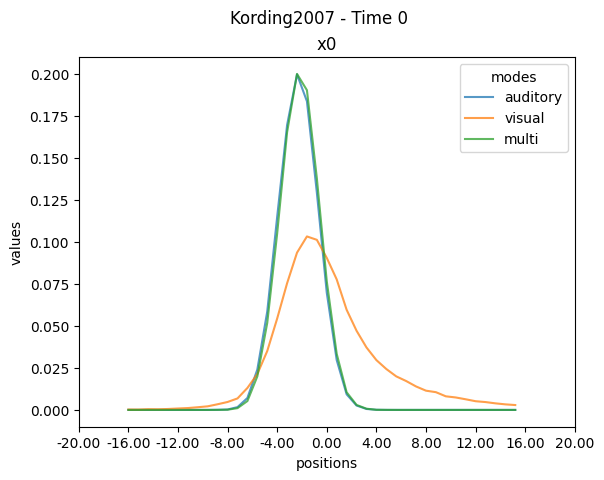

In [43]:
res = model.run(auditory_position=-3, visual_position=3, causes_kind="count")
res.plot()

The model shows how the less precise stimulus location (in this case, visual) is biased towards the more precise one. This happens because the model is computing the unisensory estimates based on the probability of the stimuli originating from a common source. 

We can directly observe the probability of the stimuli originating from a common cause:

In [44]:
print("p(C=1):", res.e_["mean_p_common_cause"])
print("C:", res.causes_)

p(C=1): 0.561605322439197
C: 1


> This demonstration of the Bayesian Causal Inference model mechanics is inspired in the tutorial of the [BCIT Toolbox](https://github.com/multisensoryperceptionlab/BCIT/blob/master/Documentation/BCIT_Documentation_5.1.2017.pdf).

## Implementation of neural models

You can implement the network model developed by Cuppini et al. (2017) on by importing the corresponding module and instantiating the `Cuppini2017` class:

In [46]:
from skneuromsi.neural import Cuppini2017

model = Cuppini2017(neurons=90, position_range=(0, 90))

You can refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/neural/_cuppini2017.html) for more details about the available parameters.

As before, let's run the model for two conflicting stimulus locations:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

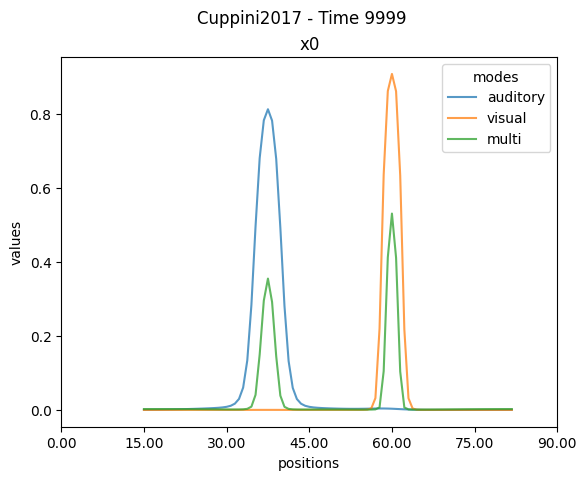

In [54]:
res = model.run(auditory_position=30, visual_position=60)
res.plot()

By the neural activity values of the multisensory area (green line) we observe that the model detects two distinct causes from the stimuli. We can confirm this by looking at the causes output of the model:

In [55]:
print("C:", res.causes_)

C: 2


Now let's see what happens if we reduce the distance of the stimuli:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

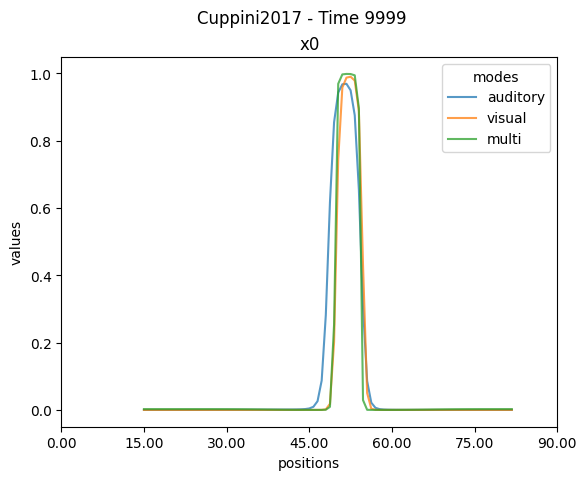

In [58]:
res = model.run(auditory_position=40, visual_position=50)
res.plot()

In [59]:
print("C:", res.causes_)

C: 1


The model outputs a common cause for stimuli close in space.